In [ ]:
!pip install rawpy
!pip install imageio

     |████████████████████████████████| 1.6MB 4.9MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import rawpy
import imageio
import glob
import os
import cv2
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
def pack_raw(raw):
    # pack Bayer image to 4 channels
    im = raw.raw_image_visible.astype(np.float32)
    im = np.maximum(im - 512, 0) / (16383 - 512)  # subtract the black level
    #plt.imshow(im)
    print(im.shape)
    im = np.expand_dims(im, axis=2)
    print(im.shape)
    img_shape = im.shape
    H = img_shape[0]
    W = img_shape[1]
    print(H,W)

    out = np.concatenate((im[0:H:2, 0:W:2, :],
                          im[0:H:2, 1:W:2, :],
                          im[1:H:2, 1:W:2, :],
                          im[1:H:2, 0:W:2, :]), axis=2)
    print(out.shape)
    #print(out.dtype)
    #print(out)
    return out


In [ ]:
def get_paths_fns(train_id):

    '''in_files = glob.glob(input_dir + '%05d_00*.ARW' % train_id)
    in_path = in_files[np.random.random_integers(0, len(in_files) - 1)]
    in_fn = os.path.basename(in_path)

    gt_files = glob.glob(gt_dir + '%05d_00*.ARW' % train_id)
    gt_path = gt_files[0]
    gt_fn = os.path.basename(gt_path)'''

    #input filename
    in_files = glob.glob('/content/drive/My Drive/sid_sample/%05d_00*.ARW' % train_id)
    in_fn_list=in_files
    in_files = [os.path.basename(in_path) for in_path in in_files]
    #in_files.sort()
    in_fn_list.sort()
    in_path_list=[in_fn_list[i] for i in range(2)]
    print("infnlist",in_fn_list)
    print('infiles',in_files)
    print("inpathlist",in_path_list)
    
    gt_path = in_fn_list[2]
    print("gt path list",gt_path)
  
    return in_path_list, gt_path, in_files,in_fn_list


In [ ]:
def get_imgs(train_id):
    # get dataset's input and ground truth processed images for a given train_id
    
    in_path_list, gt_path, in_files,in_fn_list = get_paths_fns(train_id)

    # exposure ratio between input and ground truth
    in_exposure_list = [float(in_fn[9:-5]) for in_fn in in_files]
    in_exposure_list.sort()

    gt_exposure = in_exposure_list[2]
    in_exposure_list=[float(in_exposure_list[i]) for i in range(2)]
    print("inexp",in_exposure_list," gtexp ",gt_exposure)
    ratio_list = [min(gt_exposure / in_exposure, 300) for in_exposure in in_exposure_list]

    # reading input
    input_img_list = [rawpy.imread(in_path) for in_path in in_path_list]
    input_img_list = [pack_raw(input_img) * ratio   for input_img, ratio in zip( input_img_list,ratio_list)]    # (H,W,C)  C = 4 

    # reading ground truth
    gt_img = rawpy.imread(gt_path)
    gt_img = gt_img.postprocess(use_camera_wb=True, half_size=False, no_auto_bright=True, output_bps=16) 
    gt_img = np.float32(gt_img / 65535.0)  #normalization
    
    return input_img_list, gt_img,in_path_list

In [ ]:
def preprocess():
  train_fns = glob.glob('/content/drive/My Drive/sid_sample/0*.ARW')#'/content/drive/My drive/sid_sample/0*.ARW')
  train_ids = [int(os.path.basename(train_fn)[0:5]) for train_fn in train_fns]
  in_train_id = list(set(train_ids))
  in_train_id.sort()
  print(train_fns)
  print("train ids: ",in_train_id)
  k=0
  for id in in_train_id:
    input_img_list, gt_img,in_path_list = get_imgs(id)
   # print("input path",in_path_list)
    for i,j in zip( input_img_list,in_path_list):
      print(j)
      display(j,k)
      k=disp(k)
      plt.figure(clear=True)
      plt.imshow(i)
      plt.show()
      

In [ ]:



def display(j,k):
  
  path = j
  print(path)
  with rawpy.imread(path) as raw:
      rgb = raw.postprocess(no_auto_bright=True)
      imageio.imsave('img%d.jpg'%k, rgb)
     
def disp(k):
  
  image = Image.open('img%d.jpg'%k)
  print(image.format_description)
  plt.title('img%d.jpg'%k)
  plt.imshow(image)
  plt.show()
  return k+1

['/content/drive/My Drive/sid_sample/00001_00_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_00_0.04s.ARW', '/content/drive/My Drive/sid_sample/00001_01_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_01_0.04s.ARW', '/content/drive/My Drive/sid_sample/00001_02_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_03_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_04_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_05_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_06_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_07_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_09_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_08_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_00_10s.ARW']
train ids:  [1]
infnlist ['/content/drive/My Drive/sid_sample/00001_00_0.04s.ARW', '/content/drive/My Drive/sid_sample/00001_00_0.1s.ARW', '/content/drive/My Drive/sid_sample/00001_00_10s.ARW']
infiles ['00001_00_0.1s.ARW', '00001_00_0.04s.ARW', '00001_00_10s.ARW']
inpa

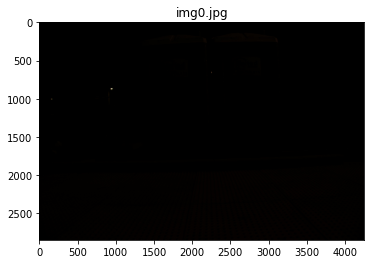

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


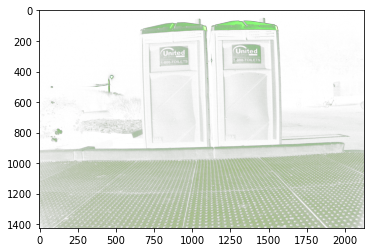

/content/drive/My Drive/sid_sample/00001_00_0.1s.ARW
/content/drive/My Drive/sid_sample/00001_00_0.1s.ARW
JPEG (ISO 10918)


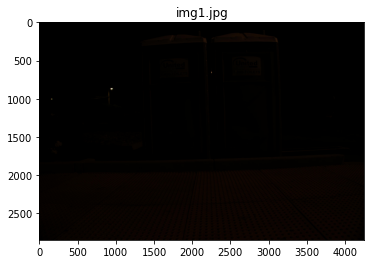

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


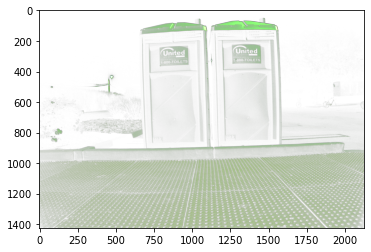

In [ ]:
preprocess()